# Análisis Datos de Radiación Solar en el Distrito Metropolitano de Quito

# Indice

- [Preparación de los datos meteorológicos del DMQ](#Preparación-de-los-datos-meteorológicos-del-DMQ)
    - [Carga de los datos](#Carga-de-los-datos)
    - [Creación del dataset](#Creación-del-dataset)
    - [Completitud del dataset](#Completitud-del-dataset)
- [Exploración de los datos meteorológicos](#Exploración-de-los-datos-meteorológicos-del-DMQ)
    - [Correlación de datos meteorológicos del DMQ](#Correlación-de-datos-meteorológicos-del-DMQ)
    - [Correlación de datos meteorológicos de la estación Carapungo](#Correlación-de-datos-meteorológicos-de-la-estación-Carapungo)
- [Exploración de los datos de radiación solar](#Exploración-de-los-datos-de-radiación-solar)
    - [Serie de tiempo de la radiación solar por mes del DMQ](#Serie-de-tiempo-de-la-radiación-solar-por-mes-del-DMQ)
    - [Principales datos estadísticos de radiación solar del DMQ](#Principales-datos-estadísticos-de-radiación-solar-del-DMQ)
    - [Serie de tiempo de radiación solar por mes en la estación Carapungo 2004-2022](#Serie-de-tiempo-de-radiación-solar-por-mes-en-la-estación-Carapungo-2004-2022)
    - [Diagrama de cajas de la variabilidad mensual de la radiación solar en el DMQ](#Diagrama-de-cajas-de-la-variabilidad-mensual-de-la-radiación-solar-en-el-DMQ)
    - [Curvas de la distribución datos de radiación solar del DMQ](#Curvas-de-la-distribución-datos-de-radiación-solar-del-DMQ)
    - [Serie de tiempo de la radiación solar por mes estación Carapungo particionada, 80% para entrenamiento y 20% para prueba](#Serie-de-tiempo-de-la-radiación-solar-por-mes-estación-Carapungo-particionada,-80%-para-entrenamiento-y-20%-para-prueba)

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from functools import reduce 
import missingno as msno

from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import plotly.express as px 
sns.set_style('darkgrid')

## Preparación de los datos meteorológicos del DMQ

[Indice](#Indice)

### Carga de los datos

[Indice](#Indice)

In [3]:
# Dirección del Viento
DIR = pd.read_excel('DIR.xlsx') #Leer datos
DIR = DIR.loc[1:,:] #Seleccionar los datos 

#Humedad
HUM = pd.read_excel('HUM.xlsx')
HUM = HUM.loc[1:,:]

#Presión del aire
PRE = pd.read_excel('PRE.xlsx')
PRE = PRE.loc[1:,:]

#Radiación Solar
RS = pd.read_excel('RS.xlsx')
RS = RS.loc[1:,:]

#Temperatura
TMP = pd.read_excel('TMP.xlsx')
TMP = TMP.loc[1:,:]

#Velocidad del viento
VEL = pd.read_excel('VEL.xlsx')
VEL = VEL.loc[1:,:]

In [4]:
DIR.rename(columns={'Unnamed: 0':'date'}, inplace=True)
HUM.rename(columns={'Unnamed: 0':'date'}, inplace=True)
PRE.rename(columns={'Unnamed: 0':'date'}, inplace=True)
RS.rename(columns={'Unnamed: 0':'date'}, inplace=True)
TMP.rename(columns={'Unnamed: 0':'date'}, inplace=True)
VEL.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [5]:
DIR.date = pd.to_datetime(DIR.date)
HUM.date = pd.to_datetime(HUM.date)
PRE.date = pd.to_datetime(PRE.date)
RS.date = pd.to_datetime(RS.date)
TMP.date = pd.to_datetime(TMP.date)
VEL.date = pd.to_datetime(VEL.date)

In [6]:
DIR.set_index('date', inplace = True)
HUM.set_index('date', inplace = True)
PRE.set_index('date', inplace = True)
RS.set_index('date', inplace = True)
TMP.set_index('date', inplace = True)
VEL.set_index('date', inplace = True)

### Creación del dataset

[Indice](#Indice)

In [7]:
DIR_HUM = DIR.merge(HUM, how='outer', on = 'date', suffixes=('_DIR', '_HUM')) #Unir los datos

PRE_RS = PRE.merge(RS, how='outer', on = 'date', suffixes=('_PRE', '_RS'))

TMP_VEL = TMP.merge(VEL, how='outer', on= 'date', suffixes=('_TMP', '_VEL'))

DIR_HUM_TMP_VEL = DIR_HUM.merge(TMP_VEL, how='outer', on = 'date')

DIR_HUM_TMP_VEL_PRE_RS = DIR_HUM_TMP_VEL.merge(PRE_RS, how='outer', on= 'date')

df = DIR_HUM_TMP_VEL_PRE_RS

In [8]:
df.to_csv('DIR_HUM_TMP_VEL_PRE_RS.csv')

### Completitud del dataset

[Indice](#Indice)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158544 entries, 2004-01-01 00:00:00 to 2022-01-31 23:00:00
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Belisario_DIR   155759 non-null  object
 1   Carapungo_DIR   152231 non-null  object
 2   Centro_DIR      27565 non-null   object
 3   Cotocollao_DIR  148962 non-null  object
 4   ElCamal_DIR     137550 non-null  object
 5   Guamani_DIR     43244 non-null   object
 6   LosChillos_DIR  156320 non-null  object
 7   SanAntonio_DIR  42145 non-null   object
 8   Tumbaco_DIR     156386 non-null  object
 9   Belisario_HUM   156633 non-null  object
 10  Carapungo_HUM   154960 non-null  object
 11  Centro_HUM      27561 non-null   object
 12  Cotocollao_HUM  134855 non-null  object
 13  ElCamal_HUM     138040 non-null  object
 14  Guamani_HUM     43544 non-null   object
 15  LosChillos_HUM  156998 non-null  object
 16  SanAntonio_HUM  42139 non-null   object


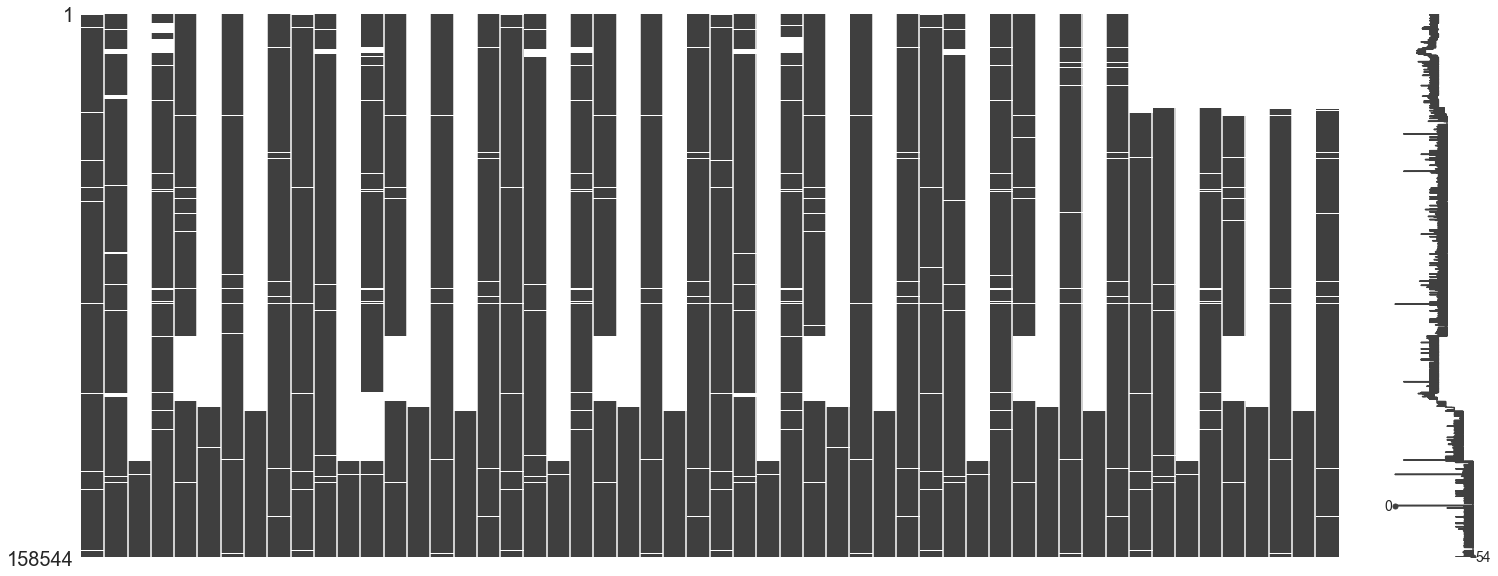

In [10]:
msno.matrix(df)
plt.savefig('diag_complet1.pdf')

In [11]:
def a_numerico(df):
    for i in df.columns:
        df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [12]:
a_numerico(df)

In [13]:
COLUMNAS_DESECHAR = ['Centro_DIR','Centro_HUM', 'Centro_TMP', 'Centro_VEL','Centro_PRE', 'Centro_RS', 
                    'SanAntonio_DIR','SanAntonio_HUM', 'SanAntonio_TMP', 'SanAntonio_VEL','SanAntonio_PRE', 'SanAntonio_RS',
                    'Guamani_DIR','Guamani_HUM', 'Guamani_TMP', 'Guamani_VEL','Guamani_PRE', 'Guamani_RS',
                    'ElCamal_DIR','ElCamal_HUM', 'ElCamal_TMP', 'ElCamal_VEL','ElCamal_PRE', 'ElCamal_RS', 'Cotocollao_HUM']

In [14]:
df.drop(COLUMNAS_DESECHAR, inplace=True, axis=1)

In [15]:
df.columns

Index(['Belisario_DIR', 'Carapungo_DIR', 'Cotocollao_DIR', 'LosChillos_DIR',
       'Tumbaco_DIR', 'Belisario_HUM', 'Carapungo_HUM', 'LosChillos_HUM',
       'Tumbaco_HUM', 'Belisario_TMP', 'Carapungo_TMP', 'Cotocollao_TMP',
       'LosChillos_TMP', 'Tumbaco_TMP', 'Belisario_VEL', 'Carapungo_VEL',
       'Cotocollao_VEL', 'LosChillos_VEL', 'Tumbaco_VEL', 'Belisario_PRE',
       'Carapungo_PRE', 'Cotocollao_PRE', 'LosChillos_PRE', 'Tumbaco_PRE',
       'Belisario_RS', 'Carapungo_RS', 'Cotocollao_RS', 'LosChillos_RS',
       'Tumbaco_RS'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158544 entries, 2004-01-01 00:00:00 to 2022-01-31 23:00:00
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Belisario_DIR   155759 non-null  float64
 1   Carapungo_DIR   152231 non-null  float64
 2   Cotocollao_DIR  148962 non-null  float64
 3   LosChillos_DIR  156320 non-null  float64
 4   Tumbaco_DIR     156386 non-null  float64
 5   Belisario_HUM   156633 non-null  float64
 6   Carapungo_HUM   154960 non-null  float64
 7   LosChillos_HUM  156998 non-null  float64
 8   Tumbaco_HUM     156415 non-null  float64
 9   Belisario_TMP   156606 non-null  float64
 10  Carapungo_TMP   154216 non-null  float64
 11  Cotocollao_TMP  154673 non-null  float64
 12  LosChillos_TMP  156970 non-null  float64
 13  Tumbaco_TMP     156421 non-null  float64
 14  Belisario_VEL   156586 non-null  float64
 15  Carapungo_VEL   153802 non-null  float64
 16  Cotocollao_VEL  150836

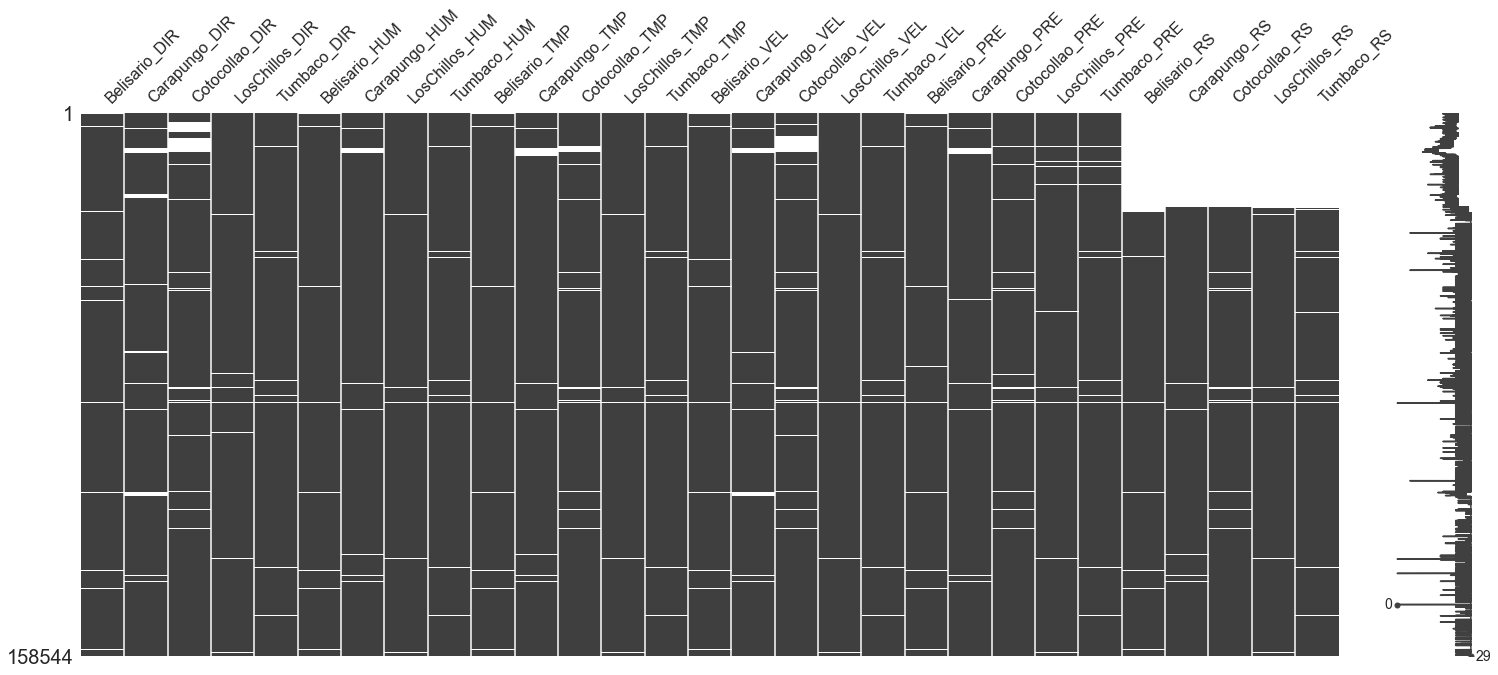

In [17]:
msno.matrix(df)
plt.savefig('diag_complet2.pdf')

In [18]:
df.drop( df.index[df.index < '2007-05-01  00:00:00'],  inplace=True, axis=0)

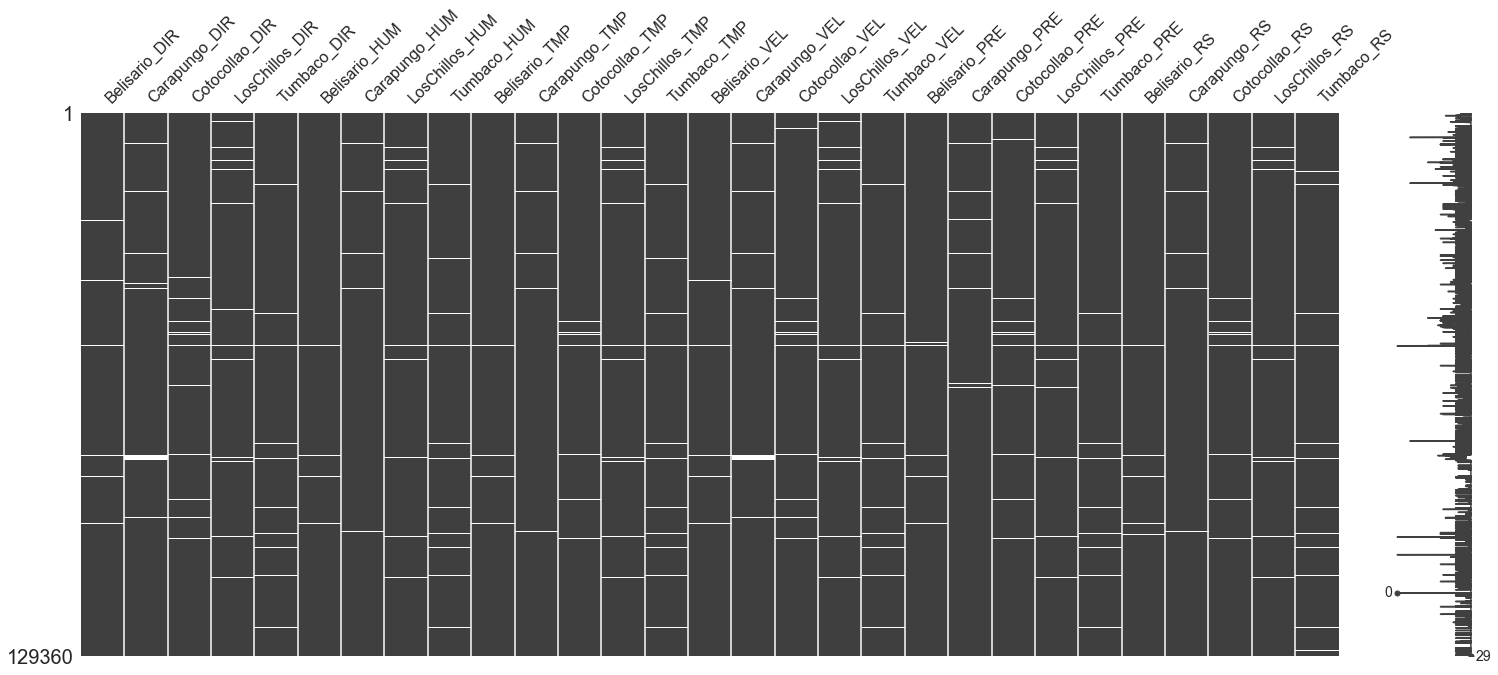

In [19]:
msno.matrix(df)
plt.savefig('diag_complet3.pdf')

In [20]:
df.to_csv('dataset_final.csv')

In [21]:
df.isnull().sum()

Belisario_DIR     1872
Carapungo_DIR     2966
Cotocollao_DIR    2090
LosChillos_DIR    2124
Tumbaco_DIR       2027
Belisario_HUM     1295
Carapungo_HUM     1399
LosChillos_HUM    1446
Tumbaco_HUM       1998
Belisario_TMP     1290
Carapungo_TMP     1460
Cotocollao_TMP    1618
LosChillos_TMP    1474
Tumbaco_TMP       1992
Belisario_VEL     1353
Carapungo_VEL     2474
Cotocollao_VEL    2036
LosChillos_VEL    1687
Tumbaco_VEL       2001
Belisario_PRE     1529
Carapungo_PRE     1823
Cotocollao_PRE    1879
LosChillos_PRE    1538
Tumbaco_PRE       2008
Belisario_RS      1317
Carapungo_RS      1398
Cotocollao_RS     1638
LosChillos_RS     1471
Tumbaco_RS        2125
dtype: int64

In [22]:
df.head()

,Belisario_DIR,Carapungo_DIR,Cotocollao_DIR,LosChillos_DIR,Tumbaco_DIR,Belisario_HUM,Carapungo_HUM,LosChillos_HUM,Tumbaco_HUM,Belisario_TMP,...,Belisario_PRE,Carapungo_PRE,Cotocollao_PRE,LosChillos_PRE,Tumbaco_PRE,Belisario_RS,Carapungo_RS,Cotocollao_RS,LosChillos_RS,Tumbaco_RS
date,,,,,,,,,,,,,,,,,,,,,
2007-05-01 00:00:00,215.97,235.55,302.96,103.62,164.71,91.39,89.74,100.0,100.0,9.81,...,727.03,742.91,730.80,772.47,772.47,0.0,0.0,0.0,0.0,0.0
2007-05-01 01:00:00,219.77,236.15,266.29,57.82,224.14,88.81,89.27,100.0,100.0,10.31,...,726.85,742.38,730.21,771.89,771.89,0.0,0.0,0.0,0.0,0.0
2007-05-01 02:00:00,281.95,242.44,237.93,77.89,110.61,90.21,89.72,100.0,100.0,10.29,...,726.16,741.85,729.63,771.29,771.29,0.0,0.0,0.0,0.0,0.0
2007-05-01 03:00:00,208.02,168.86,164.35,59.22,151.19,92.08,92.15,100.0,100.0,9.89,...,725.30,741.50,729.23,770.85,770.85,0.0,0.0,0.0,0.0,0.0
2007-05-01 04:00:00,228.44,242.20,112.50,59.86,211.34,93.18,92.01,100.0,100.0,9.45,...,725.48,741.57,729.35,771.09,771.09,0.0,0.0,0.0,0.0,0.0


In [23]:
df = df.ffill()

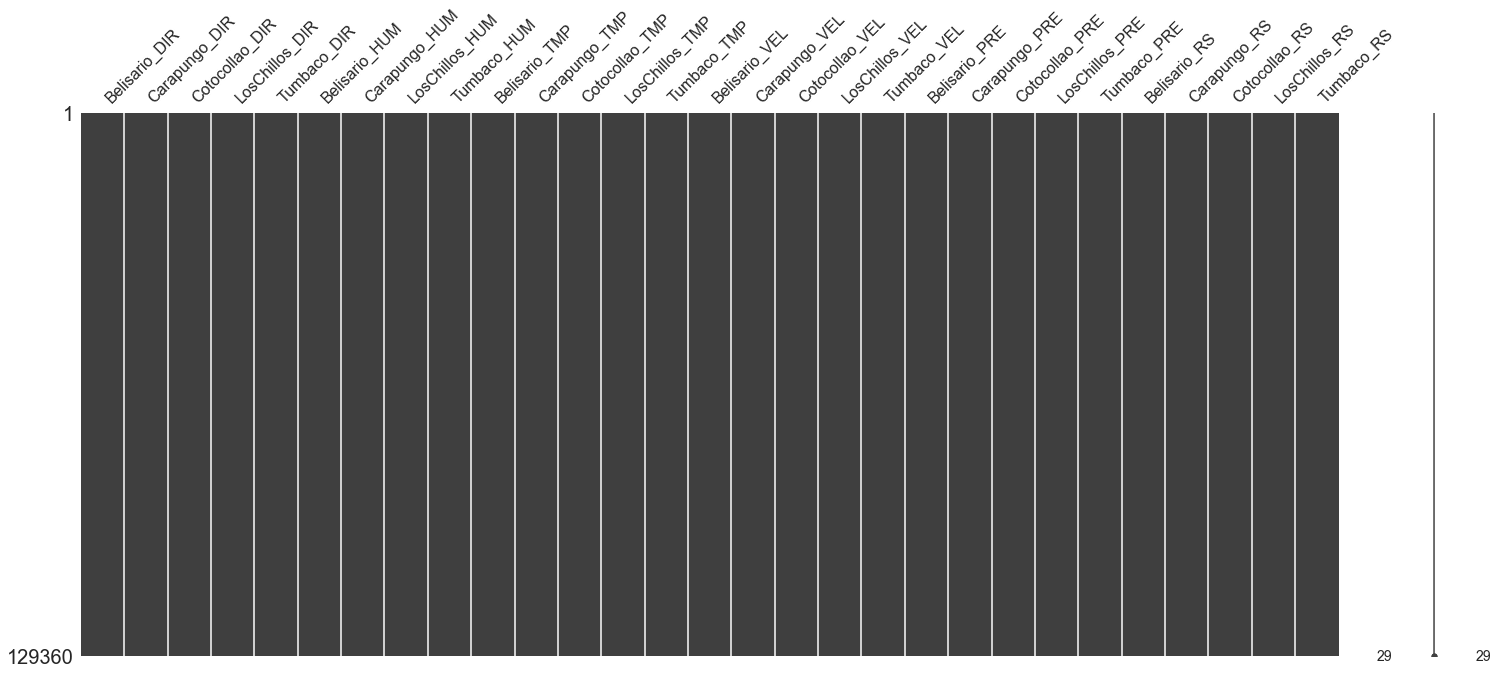

In [24]:
msno.matrix(df)
plt.savefig('diag_complet_final.pdf')

## Exploración de los datos meteorológicos del DMQ

[Indice](#Indice)

In [25]:
data_carapungo = df.iloc[ :, [1,6,10,15,20,25]]

In [26]:
print(data_carapungo)

                     Carapungo_DIR  Carapungo_HUM  Carapungo_TMP  \
date                                                               
2007-05-01 00:00:00         235.55          89.74          11.50   
2007-05-01 01:00:00         236.15          89.27          11.67   
2007-05-01 02:00:00         242.44          89.72          11.57   
2007-05-01 03:00:00         168.86          92.15          10.78   
2007-05-01 04:00:00         242.20          92.01          11.02   
...                            ...            ...            ...   
2022-01-31 19:00:00         347.22          94.45          12.05   
2022-01-31 20:00:00         338.79          96.70          11.72   
2022-01-31 21:00:00         341.03          99.11          11.48   
2022-01-31 22:00:00         325.73          99.50          11.41   
2022-01-31 23:00:00           2.56          99.50          11.62   

                     Carapungo_VEL  Carapungo_PRE  Carapungo_RS  
date                                             

### Correlación de datos meteorológicos del DMQ

[Indice](#Indice)

In [27]:
from pandas.plotting import autocorrelation_plot

In [28]:
correlacion1 = df.corr()

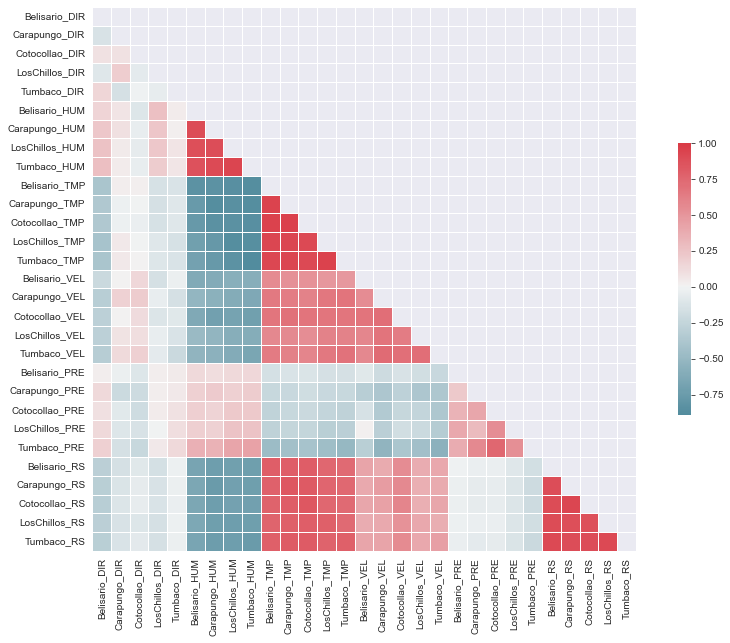

In [29]:
mask = np.triu(np.ones_like(correlacion1, dtype = np.bool))

fig2, ax = plt.subplots(figsize = (15, 10))
cmap = sn.diverging_palette(220, 10, as_cmap = True)
sn.heatmap(correlacion1, mask  = mask, vmax = 1, cmap = cmap, center = 0, linewidths=0.5,square= True, cbar_kws = {"shrink":.5})
plt.savefig('correl_pearson_vm.pdf')

### Correlación de datos meteorológicos de la estación Carapungo

[Indice](#Indice)

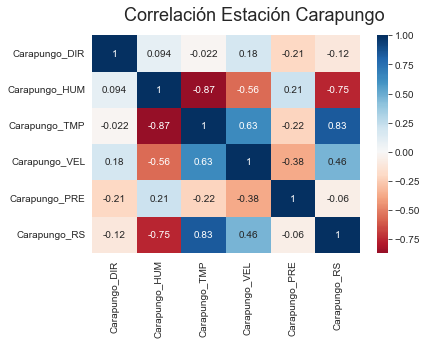

In [30]:
fig = plt.figure()
fig.suptitle('Correlación Estación Carapungo', fontsize=18)
sns.heatmap(data_carapungo.corr(), annot=True, cmap='RdBu', center=0)
plt.savefig('correl_pearson_carapungo.pdf')

## Exploración de los datos de radiación solar

[Indice](#Indice)

### Serie de tiempo de la radiación solar por mes del DMQ

[Indice](#Indice)

In [31]:
data_radiacion = df.iloc[ :, [24,25,26,27,28]]

In [32]:
data_radiacion.to_csv('datos_radiacion.csv')

In [33]:
data_radiacion.index = pd.to_datetime(data_radiacion.index) 

In [34]:
data_radiacion_mes = data_radiacion.resample('M').mean()

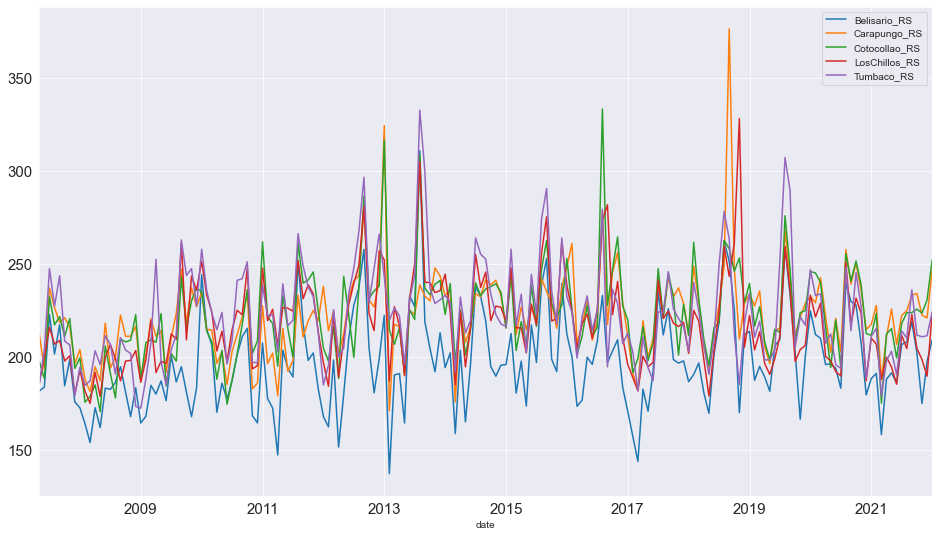

In [35]:
data_radiacion_mes.plot(figsize = (16,9), fontsize = 15)
plt.savefig('rad_solar_DMQ_mens.pdf')

### Principales datos estadísticos de radiación solar del DMQ

[Indice](#Indice)

In [36]:
data_radiacion.describe()

,Belisario_RS,Carapungo_RS,Cotocollao_RS,LosChillos_RS,Tumbaco_RS
count,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000
mean,197.541186,222.474999,222.416188,218.301052,223.425238
std,290.937306,311.815846,316.220020,317.919640,320.396631
min,0.000000,0.000000,0.000000,0.000000,-3.040000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.460000,6.910000,4.190000,1.890000,3.380000
75%,349.205000,416.872500,410.835000,399.145000,413.460000
max,1250.680000,1313.620000,1333.780000,1279.650000,1326.450000


### Serie de tiempo de radiación solar por mes en la estación Carapungo 2004-2022

[Indice](#Indice)

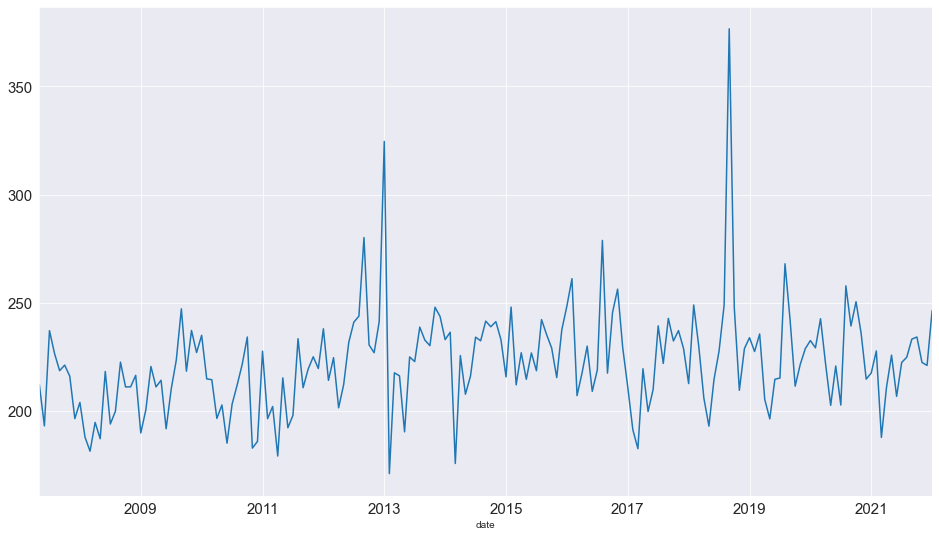

In [37]:
data_radiacion_mes['Carapungo_RS'].plot(figsize= (16,9), fontsize = 15)
plt.savefig('rad_solar_CARAP_mens.pdf')

### Diagrama de cajas de la variabilidad mensual de la radiación solar en el DMQ

[Indice](#Indice)

In [38]:
df.index = pd.to_datetime(df.index) 

In [39]:
df_mes = df.resample('M').mean()

In [40]:
df_mes.index = df_mes.index.to_period('M')

In [41]:
df_mes.columns

Index(['Belisario_DIR', 'Carapungo_DIR', 'Cotocollao_DIR', 'LosChillos_DIR',
       'Tumbaco_DIR', 'Belisario_HUM', 'Carapungo_HUM', 'LosChillos_HUM',
       'Tumbaco_HUM', 'Belisario_TMP', 'Carapungo_TMP', 'Cotocollao_TMP',
       'LosChillos_TMP', 'Tumbaco_TMP', 'Belisario_VEL', 'Carapungo_VEL',
       'Cotocollao_VEL', 'LosChillos_VEL', 'Tumbaco_VEL', 'Belisario_PRE',
       'Carapungo_PRE', 'Cotocollao_PRE', 'LosChillos_PRE', 'Tumbaco_PRE',
       'Belisario_RS', 'Carapungo_RS', 'Cotocollao_RS', 'LosChillos_RS',
       'Tumbaco_RS'],
      dtype='object')

In [42]:
dt_mes=df_mes.copy()

In [43]:
df_mes['promedio_DIR'] = (df_mes['Belisario_DIR']+ df_mes['Carapungo_DIR'] + df_mes['Cotocollao_DIR'] + df_mes['LosChillos_DIR']+ df_mes['Tumbaco_DIR'])/5

df_mes['promedio_HUM'] = (df_mes['Belisario_HUM']+ df_mes['Carapungo_HUM'] + df_mes['LosChillos_HUM'] + df_mes['Tumbaco_HUM'])/4

df_mes['promedio_TMP'] = (df_mes['Belisario_TMP']+ df_mes['Carapungo_TMP'] + df_mes['Cotocollao_TMP'] + df_mes['LosChillos_TMP']+ df_mes['Tumbaco_TMP'])/5

df_mes['promedio_VEL'] = (df_mes['Belisario_VEL']+ df_mes['Carapungo_VEL'] + df_mes['Cotocollao_VEL'] + df_mes['LosChillos_VEL']+ df_mes['Tumbaco_VEL'])/5

df_mes['promedio_PRE'] = (df_mes['Belisario_PRE']+ df_mes['Carapungo_PRE'] + df_mes['Cotocollao_PRE'] + df_mes['LosChillos_PRE']+ df_mes['Tumbaco_PRE'])/5

df_mes['promedio_RS'] = (df_mes['Belisario_RS']+ df_mes['Carapungo_RS'] + df_mes['Cotocollao_RS'] + df_mes['LosChillos_RS']+ df_mes['Tumbaco_RS'])/5


In [44]:
df_mes.rename(columns = {'promedio_DIR':'DIRECCION','promedio_HUM':'HUMEDAD','promedio_TMP':'TEMPERATURA','promedio_VEL':'VELOCIDAD','promedio_PRE':'PRESION','promedio_RS':'RADIACION_SOLAR'}, inplace=True)

In [45]:
df_mes.columns

Index(['Belisario_DIR', 'Carapungo_DIR', 'Cotocollao_DIR', 'LosChillos_DIR',
       'Tumbaco_DIR', 'Belisario_HUM', 'Carapungo_HUM', 'LosChillos_HUM',
       'Tumbaco_HUM', 'Belisario_TMP', 'Carapungo_TMP', 'Cotocollao_TMP',
       'LosChillos_TMP', 'Tumbaco_TMP', 'Belisario_VEL', 'Carapungo_VEL',
       'Cotocollao_VEL', 'LosChillos_VEL', 'Tumbaco_VEL', 'Belisario_PRE',
       'Carapungo_PRE', 'Cotocollao_PRE', 'LosChillos_PRE', 'Tumbaco_PRE',
       'Belisario_RS', 'Carapungo_RS', 'Cotocollao_RS', 'LosChillos_RS',
       'Tumbaco_RS', 'DIRECCION', 'HUMEDAD', 'TEMPERATURA', 'VELOCIDAD',
       'PRESION', 'RADIACION_SOLAR'],
      dtype='object')

In [46]:
df_mes['Mes']= df_mes.index.month

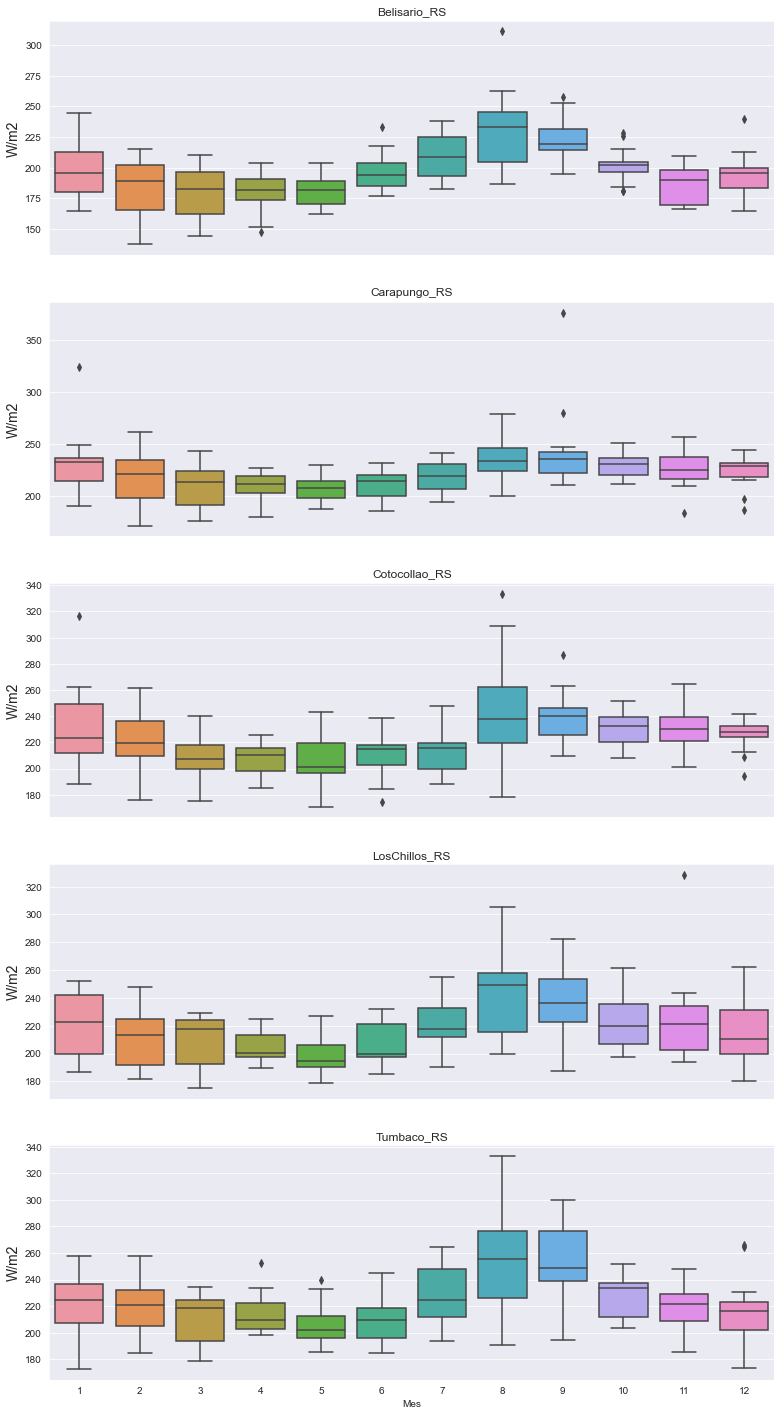

In [47]:
fig, axes = plt.subplots(5, 1, figsize = (13, 25), sharex =True)

for name, ax in zip(['Belisario_RS','Carapungo_RS','Cotocollao_RS','LosChillos_RS','Tumbaco_RS'], axes):
    sn.boxplot(data = df_mes, x='Mes', y=name, ax=ax)
    ax.set_ylabel('W/m2', fontsize = 14)
    ax.set_title(name)
    
    if ax != axes[-1]:
        ax.set_xlabel('')
        
plt.savefig('dig_cajas_rs.pdf')

### Curvas de la distribución datos de radiación solar del DMQ

[Indice](#Indice)

In [48]:
def plotRS_dist(df):
    
    cols = df.columns[0:]
    n_cols = min(len(cols), 2)
    n_rows = int(np.ceil(len(cols) / n_cols))
    sn.set()
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15))
    axes = axes.flatten() 
    df_plot = df
    for col, ax in zip(cols, axes):
        ax=sn.distplot(df_plot[col].dropna(), ax=ax, label = col, axlabel=False,)
    
        ax.legend(loc=2)
#         labels(col, "p", ax)
    return fig


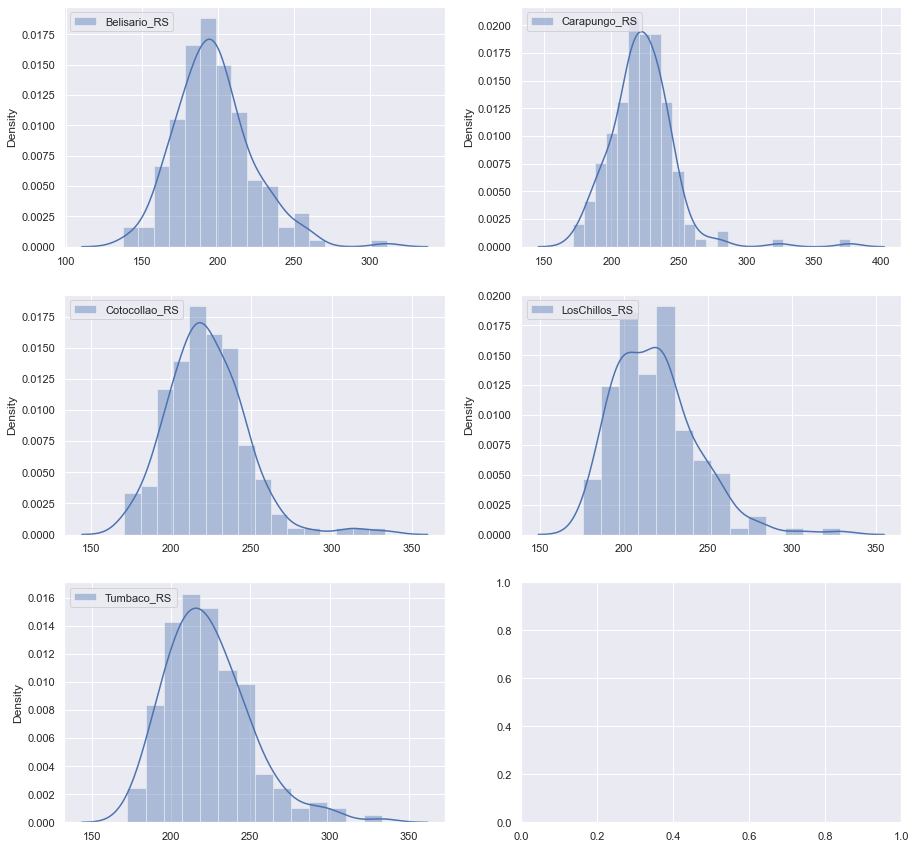

In [49]:
fig=plotRS_dist(data_radiacion_mes)
plt.savefig('distribucion_datos_rs.pdf')

### Serie de tiempo de la radiación solar por mes estación Carapungo particionada, 80% para entrenamiento y 20% para prueba

[Indice](#Indice)

In [50]:
var_metereologica = data_radiacion_mes['Carapungo_RS'].dropna()

In [51]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ftama\anaconda3

  added / updated specs:
    - conda


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-22.9.0-py39hcbf530~ --> pkgs/main::conda-22.9.0-py39haa95532_0 None


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [52]:
conda install -c conda-forge sktime-all-extras

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ftama\anaconda3

  added / updated specs:
    - sktime-all-extras


The following packages will be UPDATED:

  conda              pkgs/main::conda-22.9.0-py39haa95532_0 --> conda-forge::conda-22.9.0-py39hcbf5309_1 None


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done



In [53]:
from sktime.forecasting.model_selection import temporal_train_test_split 
from sktime.utils.plotting import plot_series 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.hcrystalball import HCrystalBallForecaster

In [54]:
var_metereologica.index = var_metereologica.index.to_period('M')

In [55]:
y_train, y_test = temporal_train_test_split(var_metereologica, test_size=0.185)

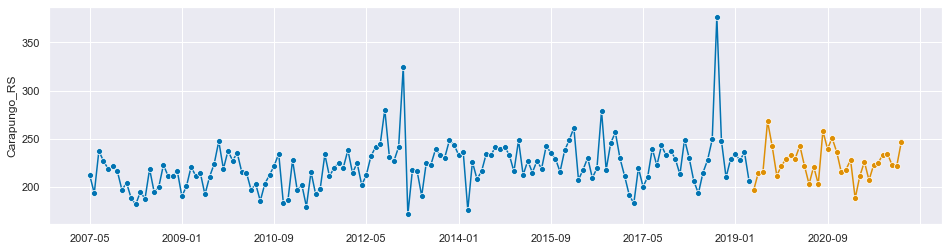

In [56]:
plot_series(y_train, y_test)
plt.savefig('div_datos_CarapungoRS.pdf')